In [38]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
#reading the csv file
df = pd.read_csv("nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [40]:
# removing the outlier

In [41]:
df["passenger_count"].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [42]:
df = df.loc[~(df['passenger_count'] == 0)]
df = df.loc[~(df['passenger_count'] == 7)]
df = df.loc[~(df['passenger_count'] == 9)]


In [43]:
df['trip_duration_hour'] = df['trip_duration'].apply(lambda x: x/3600)
df.drop(columns=['trip_duration'], inplace=True)

In [44]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration_hour    float64
dtype: object

# Build a K-Nearest neighbours’ model for the given dataset and find the best value of k


In [87]:
custom_df = df.sample(10000)

In [88]:
sample_df=custom_df

In [89]:
#seperate features and target
features = sample_df.drop(["id","vendor_id","trip_duration_hour","pickup_datetime","dropoff_datetime","store_and_fwd_flag"],axis = 1)
target = sample_df["trip_duration_hour"]

In [90]:
#seperate features and target
features = sample_df.drop(["id","vendor_id","trip_duration_hour","pickup_datetime","dropoff_datetime","store_and_fwd_flag"],axis = 1)
target = sample_df["trip_duration_hour"]

In [91]:
sample_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration_hour    float64
dtype: object

In [92]:
#converting the store and fwd flag to int type
df["passenger_count"].value_counts()

1    7097
2    1376
5     584
3     402
6     355
4     186
Name: passenger_count, dtype: int64

In [93]:
df1 = pd.concat([sample_df, pd.get_dummies(sample_df[['passenger_count']].astype('str'))], axis=1)
try:
    df1.drop(['id','vendor_id','trip_duration_hour','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count'], axis=1, inplace=True)
except KeyError:
    pass

df1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
146191,-74.013412,40.709381,-73.975502,40.681133,0,1,0,0,0,0
265532,-74.000076,40.761559,-73.994354,40.760761,1,0,0,0,0,0
513052,-73.974457,40.757908,-73.974205,40.753754,1,0,0,0,0,0
607286,-73.985367,40.737347,-74.011597,40.702568,0,0,0,0,1,0
658563,-73.943840,40.788502,-73.950119,40.778938,1,0,0,0,0,0


In [96]:
#seperate features and target
x = df1
y = df["trip_duration_hour"]
x.shape,y.shape

((10000, 10), (10000,))

In [97]:
#scaling the data(using MinMax Scaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [98]:
x = pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,0.248894,0.254970,0.329205,0.288621,0.0,1.0,0.0,0.0,0.0,0.0
1,0.285032,0.422099,0.300734,0.505790,1.0,0.0,0.0,0.0,0.0,0.0
2,0.354455,0.410406,0.331163,0.486678,1.0,0.0,0.0,0.0,0.0,0.0
3,0.324891,0.344546,0.274694,0.347080,0.0,0.0,0.0,0.0,1.0,0.0
4,0.437420,0.508400,0.367538,0.555364,1.0,0.0,0.0,0.0,0.0,0.0


In [99]:
#importing the train_test_split from sklearn
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

In [100]:
#importing knn regressor and mse metrics
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [101]:
#creating instance of KNN
reg = KNN(n_neighbors = 10)
#fitting the model
reg.fit(train_x,train_y)
#predicting over the train set and calculating F1
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("test rmse ", k)

test rmse  0.8482900308922127


# Finding the value of k using elbow method

In [102]:
def elbow(k):
    test_rmse=[]
    for i in k:
        reg = KNN(n_neighbors=i)
        reg.fit(train_x,train_y)
        tmp = reg.predict(test_x)
        tmp = sqrt(mse(tmp,test_y))
        test_rmse.append(tmp)
        
    return test_rmse    

In [103]:
k = range(1,50)

In [104]:
test = elbow(k)

Text(0.5, 1.0, 'elbow curve for test')

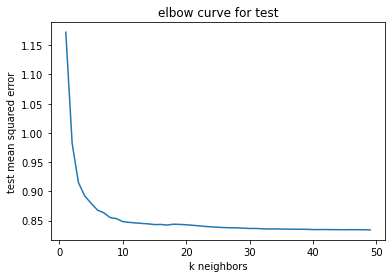

In [105]:
#plotting the curves
plt.plot(k,test)
plt.xlabel("k neighbors")
plt.ylabel("test mean squared error")
plt.title("elbow curve for test")

In [106]:
#creating instance of KNN
reg = KNN(n_neighbors = 5)
#fitting the model
reg.fit(train_x,train_y)
#predicting over the train set and calculating F1
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("test rmse ", k)

test rmse  0.879542551542604


The best value of k is 10

In [107]:
knn_train_score = reg.score(train_x,train_y)
knn_train_score*100

22.066087471354766

In [108]:
knn_test_score = reg.score(test_x,test_y)
knn_test_score*100

-13.45060950590189

In [109]:
#storing the value of train score which can be further used in other files for plotting the bar graph
%store knn_test_score

Stored 'knn_test_score' (float64)


In [110]:
#storing the value of test score which can be further used in other files for plotting the bar graph
%store knn_train_score

Stored 'knn_train_score' (float64)


In [111]:
custom_df=sample_df

In [112]:
sample_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration_hour    float64
dtype: object

In [113]:
#seperate features and target
features = sample_df.drop(["id","vendor_id","trip_duration_hour","pickup_datetime","dropoff_datetime"],axis = 1)
target = sample_df["trip_duration_hour"]

In [114]:
df1 = pd.concat([sample_df, pd.get_dummies(sample_df[['passenger_count']].astype('str'))], axis=1)
try:
    df1.drop(['id','vendor_id','trip_duration_hour','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count'], axis=1, inplace=True)
except KeyError:
    pass

df1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
146191,-74.013412,40.709381,-73.975502,40.681133,0,1,0,0,0,0
265532,-74.000076,40.761559,-73.994354,40.760761,1,0,0,0,0,0
513052,-73.974457,40.757908,-73.974205,40.753754,1,0,0,0,0,0
607286,-73.985367,40.737347,-74.011597,40.702568,0,0,0,0,1,0
658563,-73.943840,40.788502,-73.950119,40.778938,1,0,0,0,0,0


In [115]:
df1.shape

(10000, 10)

In [116]:
#seperate features and target
x = df1
y = sample_df["trip_duration_hour"]
x.shape,y.shape

((10000, 10), (10000,))

In [117]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

# Build a Linear model for the given dataset with regularisation. Attempt to interpret the variable coefficients of the Linear Model.

In [154]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [198]:
#creating an instance of LR
lr = LR()
#fitting the model
lr.fit(train_x,train_y)

LinearRegression()

In [156]:
#predicting the train values and finding the RMSE
train_predict = lr.predict(train_x)
k = sqrt(mse(train_predict,train_y))
print("training rmse ",k)

training rmse  0.6346149233354497


In [157]:
#predicting the test values and finding the RMSE
test_predict = lr.predict(test_x)
k = sqrt(mse(test_predict,test_y))
print("testing rmse ",k)

testing rmse  1.1463409343038833


In [158]:
#computing the coefficients of above model
lr.coef_

array([ 1.42080279, -0.99258854,  0.68009856, -1.06158804,  0.01102592,
        0.02619976, -0.00204601, -0.00311208, -0.01788712, -0.01418048])

# plotting the coefficients

Text(0.5, 1.0, 'coefficient plot')

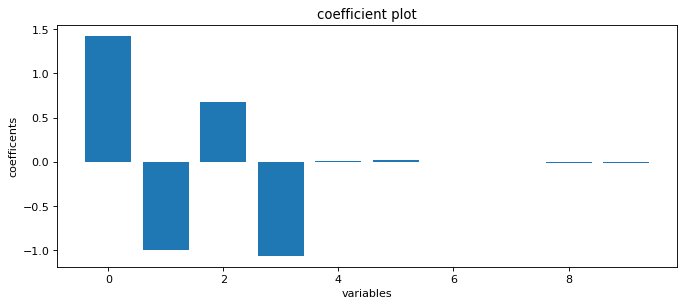

In [197]:
plt.figure(figsize=(10,4),dpi=80,facecolor="w",edgecolor="b")
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x,y)
plt.xlabel("variables")
plt.ylabel("coefficents")
plt.title("coefficient plot")

Here we can see that the model depends upon some Independent variables too much, But these coefficients are not suitable for interpretation because these are not scaled.

In [160]:
#calculating the residuals 
residuals = pd.DataFrame({
    "fitted_values":test_y,
    "predicted_values":test_predict
})
residuals["residuals"]=residuals["fitted_values"]-residuals["predicted_values"]
residuals.head()

,fitted_values,predicted_values,residuals
534484,0.201111,0.237518,-0.036407
569166,0.047778,0.177900,-0.130123
700651,0.196667,0.224883,-0.028217
492236,0.258889,0.206411,0.052478
147163,0.408611,0.260428,0.148183


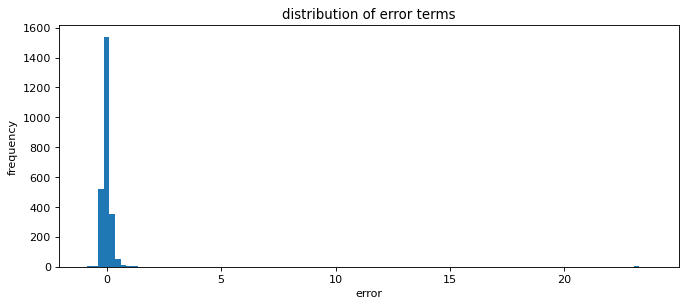

In [200]:
plt.figure(figsize=(10,4),dpi=80,facecolor="w",edgecolor="b")
plt.hist(residuals.residuals,bins=100)
plt.xlabel("error")
plt.ylabel("frequency")
plt.title("distribution of error terms")
plt.show()

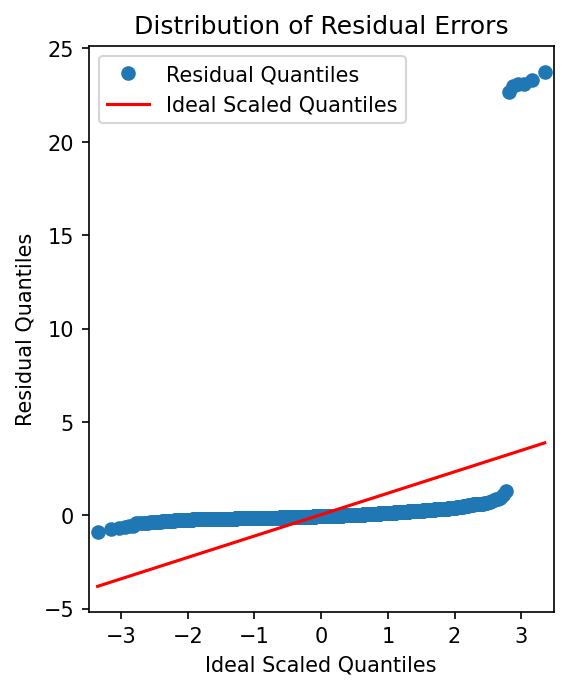

In [201]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(4,5) , dpi = 150)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.xlabel('Ideal Scaled Quantiles')
plt.ylabel('Residual Quantiles')
plt.legend(["Residual Quantiles","Ideal Scaled Quantiles"])
plt.title('Distribution of Residual Errors')
plt.show()

In [202]:
#calculating the train score 

linear_train_score = lr.score(train_x,train_y)
linear_train_score*100

1.7299572572091249

In [164]:
#calculating the test score

linear_test_score = lr.score(test_x,test_y)
linear_test_score*100

0.44375766281985474

In [165]:
#storing the value of test score which can be further used in other files for plotting the bar graph
%store linear_test_score

Stored 'linear_test_score' (float64)


In [166]:
#storing the value of train score which can be further used in other files for plotting the bar graph
%store linear_train_score

Stored 'linear_train_score' (float64)


In [167]:
sample_df=custom_df

In [168]:
sample_df.dtypes.shape

(11,)

In [169]:
df1 = pd.concat([sample_df, pd.get_dummies(sample_df[['passenger_count']].astype('str'))], axis=1)
try:
    df1.drop(['id','vendor_id','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count'], axis=1, inplace=True)
except KeyError:
    pass

df1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration_hour,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
146191,-74.013412,40.709381,-73.975502,40.681133,0.261944,0,1,0,0,0,0
265532,-74.000076,40.761559,-73.994354,40.760761,0.055278,1,0,0,0,0,0
513052,-73.974457,40.757908,-73.974205,40.753754,0.070833,1,0,0,0,0,0
607286,-73.985367,40.737347,-74.011597,40.702568,0.179722,0,0,0,0,1,0
658563,-73.943840,40.788502,-73.950119,40.778938,0.085556,1,0,0,0,0,0


In [170]:
x = df1.drop(["trip_duration_hour"],axis = 1)
y = df1["trip_duration_hour"]

In [171]:
y.shape

(10000,)

In [172]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

#  Build a Decision tree model for the given dataset. Attempt to interpret the variable importance

In [173]:
from sklearn.tree import DecisionTreeRegressor as DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
regressor = DecisionTreeRegressor()
regressor.fit(x, y)

DecisionTreeRegressor()

In [174]:
from math import sqrt
train_predict = regressor.predict(train_x)
k = sqrt(mse(train_predict,train_y))
print("training rmse ",k)

training rmse  0.0


In [175]:
from math import sqrt
test_predict = regressor.predict(test_x)
k1 = sqrt(mse(test_predict,test_y))
print("testing rmse ",k1)

testing rmse  0.0


# To interpret the variable importance.

In [176]:
x.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6'],
      dtype='object')

In [177]:
pip install xgboost

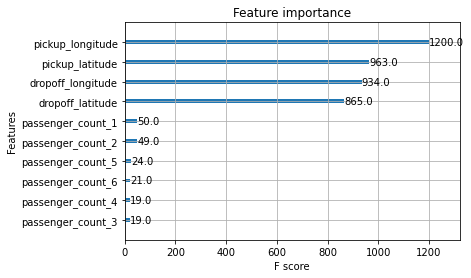

In [178]:
#Using XGBoost in order to interpret the variable importance
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt
model = XGBRegressor()
model.fit(x,y)
plot_importance(model)
plt.show()

From the above graph we can draw an insight that the varaible "dropoff_latitude" has more impact on the trip duration variable followed by "pickup_longitude" then "pickup_latitude"

In [179]:
#calculating the train score of decision tree model
decision_train_score = regressor.score(train_x,train_y)
decision_train_score*100

100.0

In [180]:
#calculating the test score of decision tree model
decision_test_score = regressor.score(test_x,test_y)
decision_test_score*100

100.0

In [181]:
#storing the test score to use it in other file
%store decision_test_score

Stored 'decision_test_score' (float64)


In [182]:
#storing the train score to use it in other file
%store decision_train_score

Stored 'decision_train_score' (float64)


# Plot the following Bar plots:
0. train score of all the above models.
1. test (not validation!) score of all the above models.
2. Attempt to explain the observations from the plots (optional)

In [183]:
decision_train_score,linear_train_score,knn_train_score

(1.0, 0.01729957257209125, 0.22066087471354767)

In [184]:
#assining the train score values in x,y
x=["decision_train_score","linear_train_score","knn_train_score"]
y=[0.9999996442282492, 0.005868613774166032, 0.22451293627095015]

In [185]:
knn_test_score, linear_test_score,decision_test_score

(-0.1345060950590189, 0.004437576628198547, 1.0)

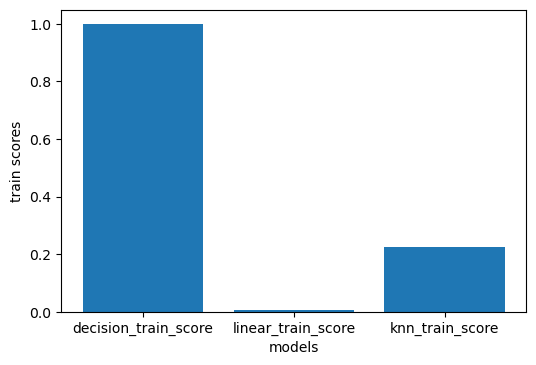

In [186]:
plt.figure(dpi=100)
plt.bar(x,y)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()

In [187]:
#assining the test score value in x1,y1
x1=["knn_test_score","linear_test_score","decision_test_score"]
y1=[-0.16425004050105008,0.00719197085905432,0.9999989502319949]

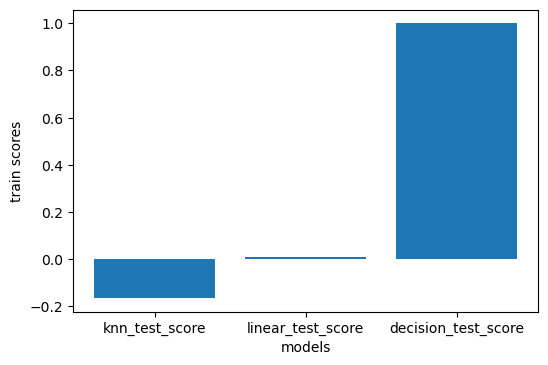

In [188]:
plt.figure(dpi=100)
plt.bar(x1,y1)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()

In [153]:
# from above graph we can see that the best model among KNN LR and DT(decision tree) the best one is DT in train score